In [ ]:
# import necessary packs and libs :
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 

In [2]:
print(f"TensorFlow Version: {tf.__version__}") 

TensorFlow Version: 2.18.0


In [3]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to add a channel dimension (28, 28, 1) for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print dataset shapes
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


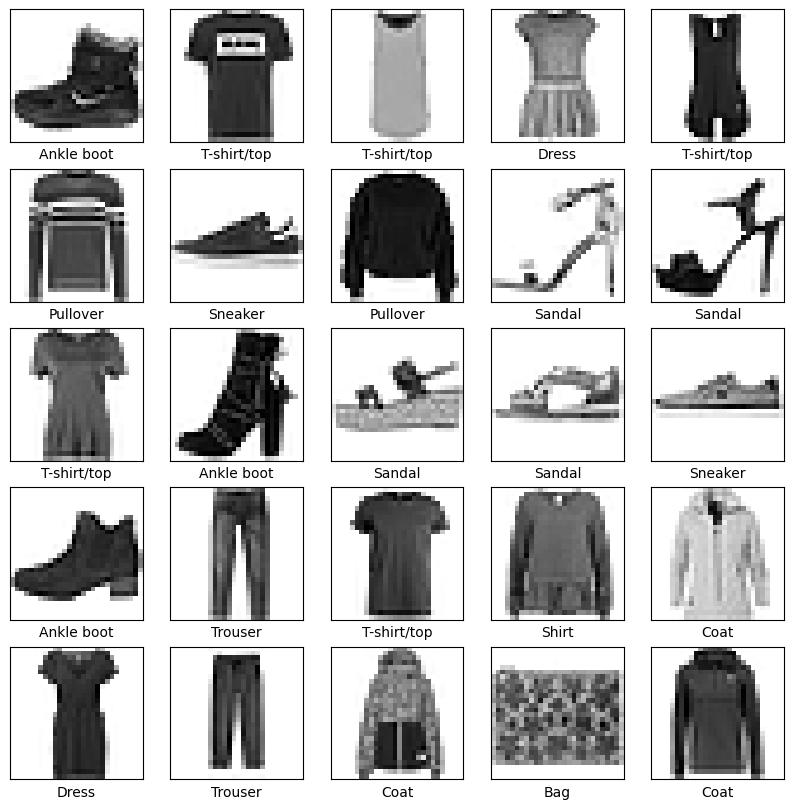

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the feature maps for the fully connected layers
    layers.Flatten(),

    # Dense Layer 1
    layers.Dense(128, activation='relu'),

    # Dropout Layer (>= 0.3)
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [10]:
# summary of the Model Aechitecture 


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,011,466 (3.86 MB)

 Trainable params: 1,011,466 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compiletation of the model


optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Define batch size
BATCH_SIZE = 64
print(f"Using a batch size of: {BATCH_SIZE}")

Using a batch size of: 64


## training

In [12]:
# Train the model for 20 epochs

EPOCHS = 20

history = model.fit(train_images, train_labels, epochs=EPOCHS,validation_data=(test_images, test_labels),batch_size=BATCH_SIZE)



Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7437 - loss: 0.7176 - val_accuracy: 0.8787 - val_loss: 0.3386
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8752 - loss: 0.3521 - val_accuracy: 0.8942 - val_loss: 0.2893
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8966 - loss: 0.2892 - val_accuracy: 0.9066 - val_loss: 0.2573
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9081 - loss: 0.2552 - val_accuracy: 0.9106 - val_loss: 0.2463
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9165 - loss: 0.2296 - val_accuracy: 0.9122 - val_loss: 0.2383
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9257 - loss: 0.2077 - val_accuracy: 0.9197 - val_loss: 0.2313
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9298 - loss: 0.1902 - val_accuracy: 0.9212 - val_loss: 0.2231
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9396 - loss: 0.1662 - val_ac

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9221 - loss: 0.3210

Final Test Accuracy: 92.21%
Final Test Loss: 0.3210


## Classification Report and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  

--- Classification Report ---
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.86      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.85      0.88      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.86      0.89      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.80      0.78      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


--- Confusion Matrix ---


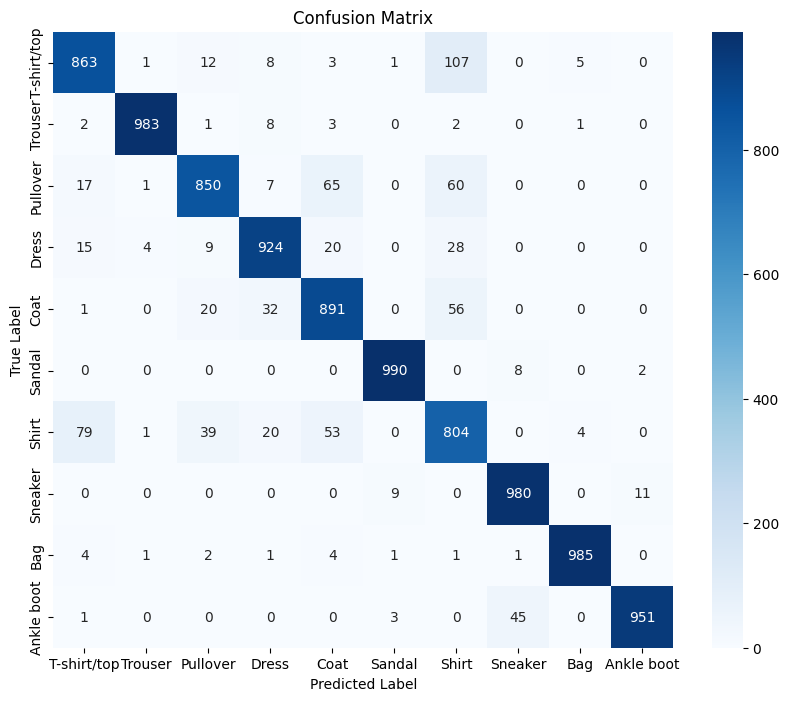



Overall Test Accuracy (from sklearn): 92.21%



In [14]:
predictions_prob = model.predict(test_images) #predictions

predicted_labels = np.argmax(predictions_prob, axis=1) #selects the index with the highest probability for each prediction

print("\n--- Classification Report ---")

print(classification_report(test_labels, predicted_labels, target_names=class_names))

print("\n--- Confusion Matrix ---")

cm = confusion_matrix(test_labels, predicted_labels)

# diagrm of cm:

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score
overall_accuracy_sklearn = accuracy_score(test_labels, predicted_labels)
print()
print(f"\nOverall Test Accuracy (from sklearn): {overall_accuracy_sklearn*100:.2f}%")
print()

## Validation curve or Plot traning:

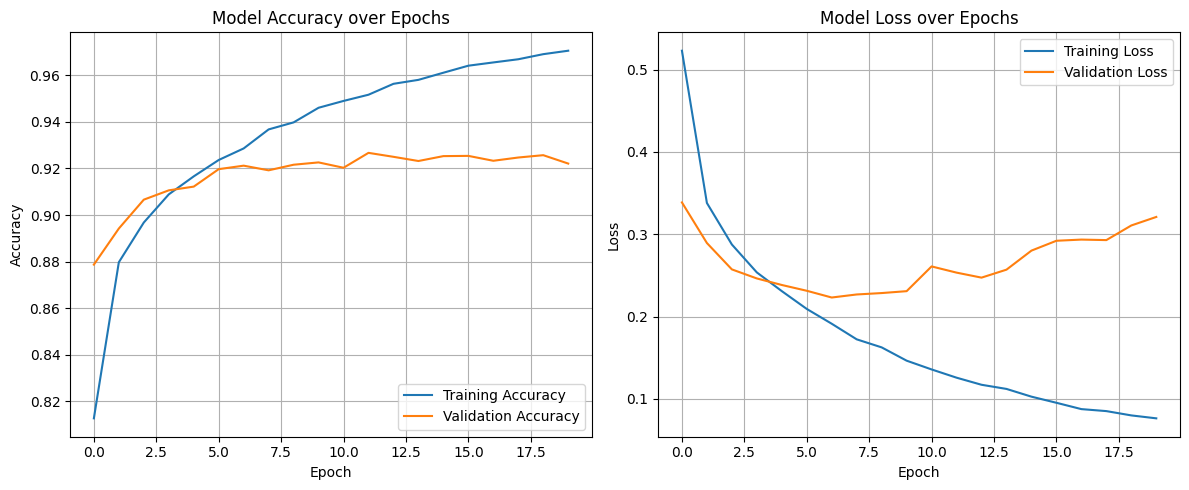

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## Make Predictions:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


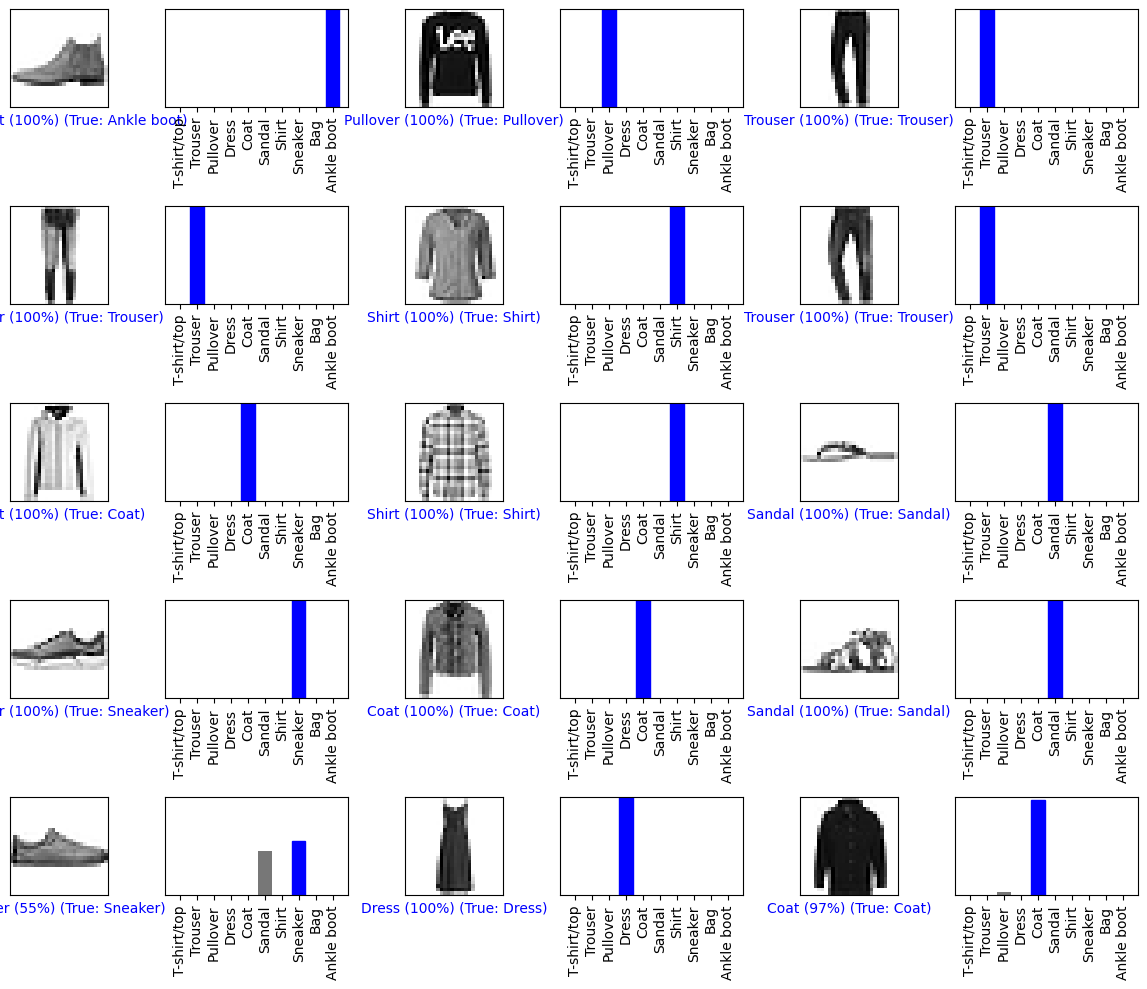

In [16]:
# Make predictions on the test set for visualization
predictions = model.predict(test_images)

# Function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%) (True: {class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()